In [10]:
# Pràctica 3: Dissolucions i dipòsits

# En aquesta pràctica comencem a treballar amb sistemes d'equacions diferencials.
# Es a dir, ja no busquem una única funció solució y(t) d'una equació diferencial, 
# sinó que busquem un conjunt de funcions (tantes com equacions formen el sistema diferencial) que formin una 
# solució del sistema. 

# Abans d'entrar en matèria, fem primer uns exemples.

In [11]:
var("t");
y=function("y")(t);
x=function("x")(t);
eq1=diff(x(t))==-y;
eq2=diff(y(t))==x;
sols=desolve_system([eq1,eq2],[x,y],ics=[0,1,0]);
show(sols)


[x(t) == cos(t), y(t) == sin(t)]

In [12]:
# Això caldria dibuixar-ho en tres dimensions, una pel temps i dues per les funcions.


In [13]:
parametric_plot3d([sols[0].rhs(), sols[1].rhs(), t], (0, 2*pi))


Graphics3d Object

In [14]:
# Jugant amb la perspectiva, ho podem veure des de diferents angles. 
# Inclús podem forçar una visió 2 dimensional de x(t), o de y(t), o fins i tot una visió de y en funció de x.

# Però si realment ens conformem amb una visió 2 dimensional, es millor demanar-la directament


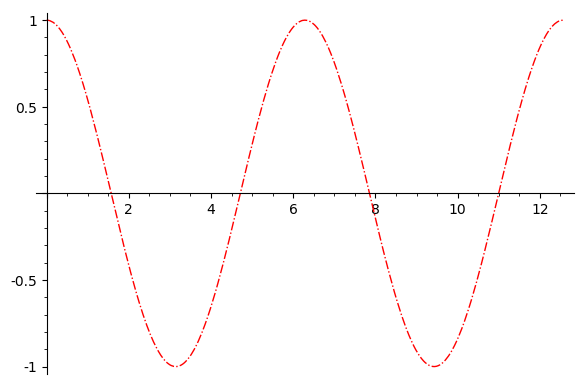

In [15]:
plot(sols[0].rhs(),t,0,4*pi,color='red',linestyle='-.')


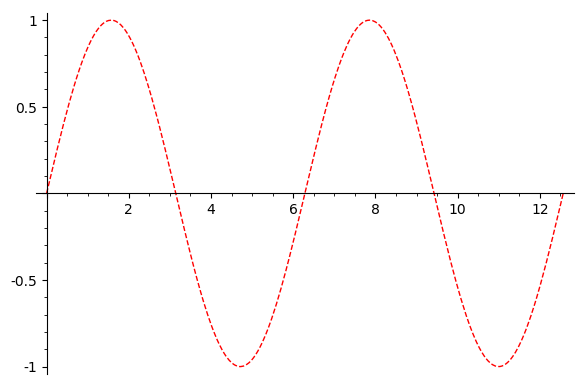

In [16]:
plot(sols[1].rhs(),t,0,4*pi,color='red',linestyle='--')


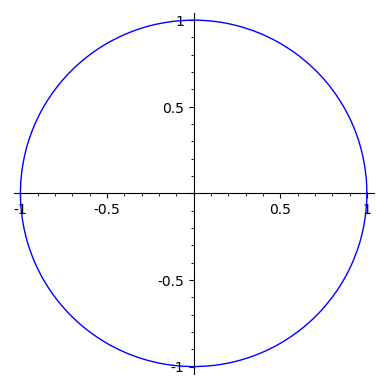

In [17]:
plotsol=parametric_plot((sols[0].rhs(),sols[1].rhs()),(t,0,2*pi));
show(plotsol)


In [18]:
# En la primera sessió de pràctiques, en la introducció que vaig fer de les equacions diferencials, 
# ja vaig mostrar el camp de vectors associat a una equació diferencial (funció plot_slope_field).

# Tornem a veure un exemple


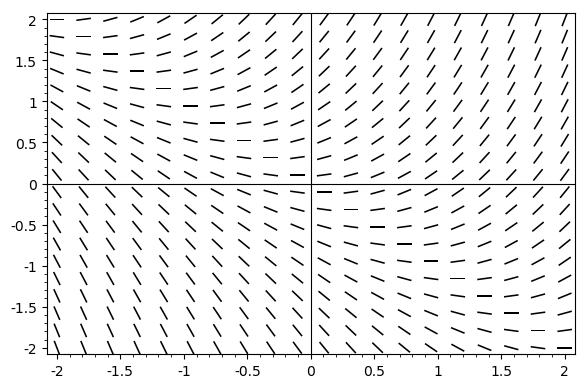

In [19]:
var("x1,y1");plot_slope_field(y1+t,(t,-2,2),(y1,-2,2))


In [20]:
# Si volguéssim fer el mateix amb un sistema de (dos) equacions diferencials, necessitaríem un dibuix 3D 
# (com hem fet per la solució). Molt possiblement, no veuríem gran cosa en ell doncs amb tant guionets es 
# taparien els uns als altres.

# Però en canvi si podem tractar de dibuixar el camp de vectors sobre el pla de les solucions. 


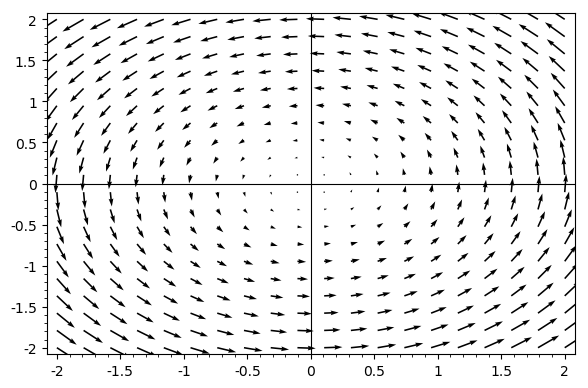

In [21]:
camp=plot_vector_field((-y1,x1),(x1,-2,2),(y1,-2,2));
show(camp)
#Es l'edo que cumpleix x1'=-y1, y1'=x1

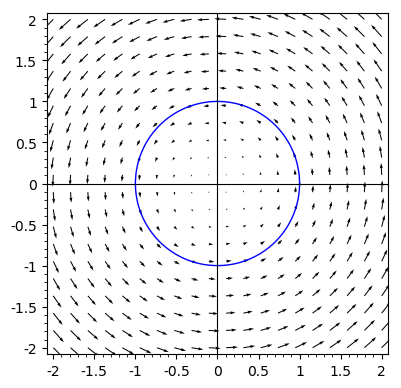

In [22]:
show(camp+plotsol)


In [8]:
# En aquest cas, el que obtenim si que es realment un camp de vectors, on la magnitud del vector 
# està relacionada amb la velocitat en que es recorre la solució. L'exemple en aquest cas és molt 
# aclaridor, doncs les solucions son cercles, i que es recorren tots ells amb un temps 2*pi. Per 
# tant, es obvi que els cercles més grans s'han de recórrer a velocitat més gran que els més petits.  


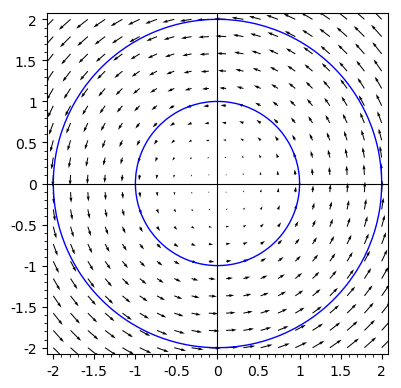

In [24]:
sols=desolve_system([eq1,eq2],[x,y],ics=[0,2,0]);
plotsol2=parametric_plot((sols[0].rhs(),sols[1].rhs()),(t,0,2*pi));
show(camp+plotsol+plotsol2)


In [25]:
#2 Models de dissolucions


In [26]:
# x(t) quantitat de substància


In [27]:
# ve(t) Velocitat d'entrada (normalment constant)


In [28]:
# vs(t) Velocitat de sortida (normalment constant)


In [29]:
# V(t) Volum del dipòsit

In [30]:
# ce(t) concentració de substància que entra (normalment constant)
# C(t) concentració de substància en el dipòsit


In [31]:
# vfe(t) Velocitat del flux entrant

In [32]:
# vfs(t) Velocitat del flux sortint

In [33]:
# diff(x(t))==ve(t)-vs(t)
# ve(t)=ce(t)*vfe(t)
# C(t)==x(t)/V(t)
# vs(t)=C(t)*vfs(t)

# diff(x(t),t)==ce(t)*vfe(t)-x(t)/V(t)*vfs(t)


In [34]:
#3 Dissolucions d'un producte en un dipòsit

In [35]:
eq1=diff(x(t))==1/3*9-x/100*9
#1/3 ja que cada 9L/min que entren, 3 són de tint
#9 ja que entra a velocitat 9l/m
#x/100 ja que hi ha inicialment 100l, V(t)=100l
# vfe(t)=9l
#vfs(t)=9l            t (en min)      

In [36]:
odesol=desolve(eq1,[x,t],[0,0])

In [37]:
odesol


100/3*(e^(9/100*t) - 1)*e^(-9/100*t)

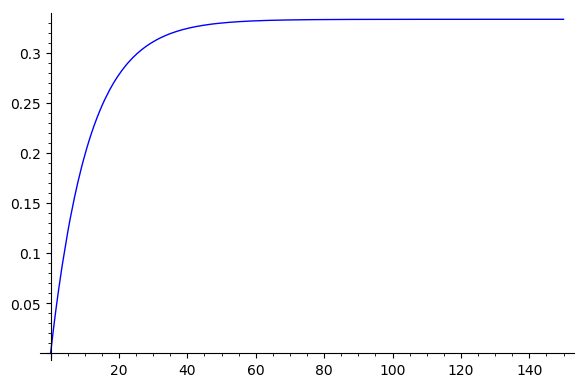

In [38]:
Plot=plot(odesol(t)/100,(t,0,150));Plot


In [39]:
odesol(t=10)/100


1/3*(e^(9/10) - 1)*e^(-9/10)

In [40]:
n(_)

0.197810113419800

In [41]:
lim(odesol/100,t=oo)

1/3

In [42]:
eq2=diff(x(t))==1/3*9-x/(100-t)*10
#Surten 10l/min però cada minut tinc 1l menys.

In [43]:
odesol2=desolve(eq2,[x,t],[0,0])

In [44]:
odesol2

-1/3000000000000000000*t^10 + 1/3000000000000000*t^9 - 3/20000000000000*t^8 + 1/25000000000*t^7 - 7/1000000000*t^6 + 21/25000000*t^5 - 7/100000*t^4 + 1/250*t^3 - 3/20*t^2 + 3*t

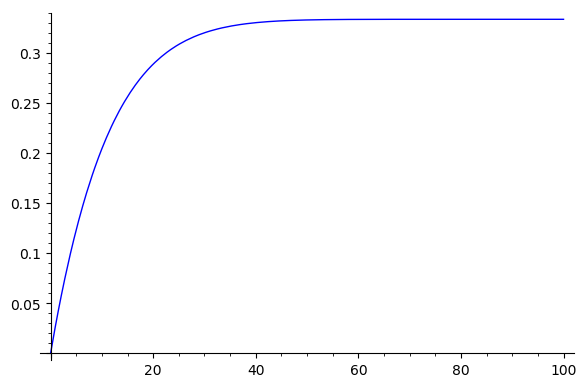

In [45]:
Plot=plot(odesol2(t)/(100-t),(t,0,100));Plot


In [46]:
odesol2(t=10)/(100-10)

612579511/3000000000

In [47]:
n(_)

0.204193170333333

In [48]:
lim(odesol2/(100-t),t=100)  ##Just quan es buida en el diferencial de temps 100 entra en concentració d'1/3

1/3

In [49]:
#4 Dissolucions d'un producte en dipòsits connectats en cadena


In [50]:
A=function("A")(t);
B=function("B")(t);

# Sabem que la concentració de tint que surt del dipòsit A és de A(t)/100. I surten 9 litres per minut que van 
# a parar al dipòsit B. Però allà s'ajunten amb 2 litres per minut d'aigua neta que també entra. Per tant la 
# concentració de tint que entra al dipòsit B és de A(t)/100*9/11


In [90]:
eqA=diff(A(t))==1/3*9-A/100*9;  #entra concentració d'1/3 i 9l i surten 9l.
eqB=diff(B(t))==(A*9/11/100)*11-B/100*11
#Al velocitat de sortida de l'A es la velocitat d'entrada a B
#I la dividim entre 1/11 doncs hi ha 11l.


In [91]:
sols=desolve_system([eqA,eqB],[A,B],ics=[0,0,0]);

In [92]:
sols

[A(t) == -100/3*e^(-9/100*t) + 100/3,
 B(t) == -150*e^(-9/100*t) + 1350/11*e^(-11/100*t) + 300/11]

In [93]:
sols[0].rhs()            ##solució de A

-100/3*e^(-9/100*t) + 100/3

In [94]:
(sols[0].rhs().substitute(t=10))/100        #solució de B

-1/3*e^(-9/10) + 1/3

In [95]:
n(_)

0.197810113419800

In [96]:
n((sols[1].rhs().substitute(t=10))/100)

0.0713963858367445

In [97]:
lim((sols[0].rhs()/100),t=oo)

1/3

In [99]:
lim((sols[1].rhs()/100),t=oo)    #ho podiam pensar com un diposit gran on entren 3 de sal y 8 de aigua...

3/11

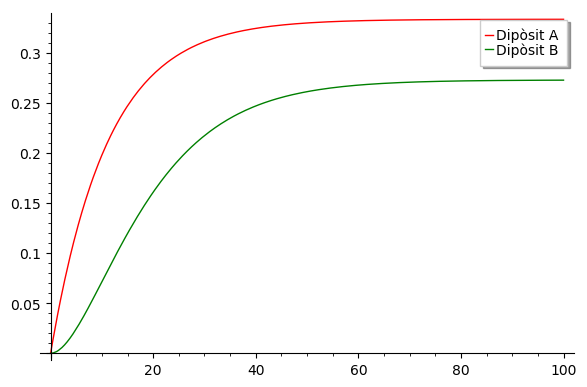

In [101]:
PlotA=plot(sols[0].rhs()/100,(t,0,100),color="red", legend_label='Dipòsit A');
PlotB=plot(sols[1].rhs()/100,(t,0,100),color="green", legend_label='Dipòsit B');PlotA+PlotB

In [104]:
# Suposem ara que la sortida del dipòsit A és de 10 l/m i la del B de 16 l/m

# El dipòsit A es buidarà al cap de 100 minuts, però al dipòsit B entren ara 10+2=12 litres i en surten 16. 
# Per tant té una pèrdua neta de 4 l/m. Per tant, el model tal i com el plantegem, te una validesa de 25 minuts. 
# Al cap d'aquest temps, tot el que surt de A, més els 2 litres extra d'aigua que afegim, surten de forma immediata.

# Com que la funció pel dipòsit A no depén del B, la solució per A segueix tenint una validesa de 100 minuts.


In [109]:
eqA=diff(A(t))==1/3*9-A/(100-t)*10;
eqB=diff(B(t))==(A*10/12/(100-t))*12-(B/(100-4*t))*16

In [110]:
sols=desolve_system([eqA,eqB],[A,B],ics=[0,0,0]);

In [112]:
sols

[A(t) == ilt((10*g6848*laplace(A(t)/(t - 100), t, g6848) + 3)/g6848^2, g6848, t),
 B(t) == ilt(-2*(5*laplace(A(t)/(t - 100), t, g6848) - 2*laplace(B(t)/(t - 25), t, g6848))/g6848, g6848, t)]

In [113]:
n((sols[0].rhs().substitute(t=10))/100)

TypeError: cannot evaluate symbolic expression numerically

In [114]:
n((sols[1].rhs().substitute(t=10))/100)

TypeError: cannot evaluate symbolic expression numerically

In [115]:
n((sols[0].rhs().substitute(t=100))/100)

ValueError: power::eval(): division by zero

In [116]:
n((sols[1].rhs().substitute(t=25))/100)

ValueError: power::eval(): division by zero

In [117]:
#5 Dissolucions d'un producte en dipòsits interconnectats


Notem (observant el dibuix de l'apartat 5) que els dos dipòsits es mantenen estables, i.e surt el mateix que entra

In [121]:
eqA=diff(A(t))==1/3*9-A/100*13+(B*4/100);
#1/3 * 9 es lo que entra per l'aixeta
# El B li pasa lo que té però passa 4l/100l que té --> concentració
eqB=diff(B(t))==1/4*8+(A*5/100)-B/100*13
# Al  B li entra d'aixeta 1/4 de les aixetes i 5L de l'A

In [122]:
sols=desolve_system([eqA,eqB],[A,B],ics=[0,0,0]);

In [123]:
sols

[A(t) == -20/149*(82*sqrt(5)*sinh(1/50*sqrt(5)*t) + 235*cosh(1/50*sqrt(5)*t))*e^(-13/100*t) + 4700/149,
 B(t) == -50/149*(47*sqrt(5)*sinh(1/50*sqrt(5)*t) + 82*cosh(1/50*sqrt(5)*t))*e^(-13/100*t) + 4100/149]

In [124]:
n((sols[0].rhs().substitute(t=10))/100)

0.189722233137345

In [125]:
n((sols[1].rhs().substitute(t=10))/100)

0.148120423690144

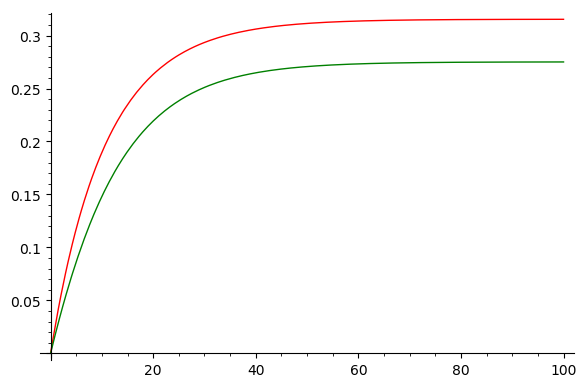

In [126]:
PlotA=plot(sols[0].rhs()/100,(t,0,100),color="red");
PlotB=plot(sols[1].rhs()/100,(t,0,100),color="green");PlotA+PlotB

In [127]:
lim((sols[0].rhs()/100),t=oo)

47/149

In [128]:
lim((sols[1].rhs()/100),t=oo)

41/149

In [130]:
eqA=diff(A(t))==1/3*9-A/100*8-A/100*5/2+(B*4/100)/4;
eqB=diff(B(t))==1/4*8+(A*5/100)/2-B/100*9-B/100*4/4
#Només em tingut en compte la concentració que entra.

In [131]:
sols=desolve_system([eqA,eqB],[A,B],ics=[0,0,0]);sols

[A(t) == -80/41*(sqrt(41)*sinh(1/400*sqrt(41)*t) + 16*cosh(1/400*sqrt(41)*t))*e^(-41/400*t) + 1280/41,
 B(t) == -20/41*(17*sqrt(41)*sinh(1/400*sqrt(41)*t) + 57*cosh(1/400*sqrt(41)*t))*e^(-41/400*t) + 1140/41]

In [132]:
n((sols[0].rhs().substitute(t=10))/100)


0.191535746680835

In [133]:
n((sols[1].rhs().substitute(t=10))/100)

0.146376799444928

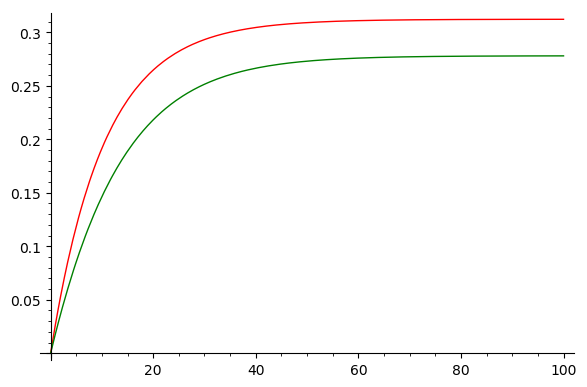

In [134]:
PlotA=plot(sols[0].rhs()/100,(t,0,100),color="red");
PlotB=plot(sols[1].rhs()/100,(t,0,100),color="green");PlotA+PlotB

In [135]:
lim((sols[0].rhs()/100),t=oo)

64/205

In [136]:
lim((sols[1].rhs()/100),t=oo)

57/205

In [85]:
#6 Dissolucions de diversos productes en dipòsits interconnectats

# Aquest model té 9 variables que evolucionen amb el temps: a saber, la quantitat de cada color que hi 
# ha a cada dipòsit.

# Les anomenem x1V, x1G, x1B, x2V, x2G, x2B, x3V, x3G, x3B.


In [137]:
x1V=function("x1V")(t);
x1G=function("x1G")(t);
x1B=function("x1B")(t);
x2V=function("x2V")(t);
x2G=function("x2G")(t);
x2B=function("x2B")(t);
x3V=function("x3V")(t);
x3G=function("x3G")(t);
x3B=function("x3B")(t);

eq1=diff(x1V(t))==x3V/15-x1V/5;
#Guanyem la quantitat de pintura vermella del III (li envia 4/60 litres de cada litre que tingui)
#Perderà la quantitat que li envia al II, aquesta es 4/20 del que tingui
eq2=diff(x2V(t))==x1V/5-x2V/10;
#En el depòsit 2 té la que rep del I i perd la que envia a III
eq3=diff(x3V(t))==x2V/10-x3V/15;
eq4=diff(x1G(t))==x3G/15-x1G/5;
eq5=diff(x2G(t))==x1G/5-x2G/10;
eq6=diff(x3G(t))==x2G/10-x3G/15;
eq7=diff(x1B(t))==x3B/15-x1B/5;
eq8=diff(x2B(t))==x1B/5-x2B/10;
eq9=diff(x3B(t))==x2B/10-x3B/15;



In [138]:
sols=desolve_system([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9],[x1V,x2V,x3V,x1G,x2G,x3G,x1B,x2B,x3B],\
ics=[0,20,0,0,0,40,0,0,0,60]);sols


[x1V(t) == -10/69*(17*sqrt(23)*sin(1/60*sqrt(23)*t) - 115*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 10/3,
 x2V(t) == 20/69*(25*sqrt(23)*sin(1/60*sqrt(23)*t) - 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20/3,
 x3V(t) == -10/23*(11*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 10,
 x1G(t) == -20/69*(11*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20/3,
 x2G(t) == 80/69*(2*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 40/3,
 x3G(t) == 20/23*(sqrt(23)*sin(1/60*sqrt(23)*t) - 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20,
 x1B(t) == 10/23*(13*sqrt(23)*sin(1/60*sqrt(23)*t) - 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 10,
 x2B(t) == -20/23*(11*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20,
 x3B(t) == 30/23*(3*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 30]

In [139]:
show(n((sols[0].rhs().substitute(t=5))));
show(n((sols[1].rhs().substitute(t=5))));
show(n((sols[2].rhs().substitute(t=5))));
show(n((sols[3].rhs().substitute(t=5))));
show(n((sols[4].rhs().substitute(t=5))));
show(n((sols[5].rhs().substitute(t=5))));
show(n((sols[6].rhs().substitute(t=5))));
show(n((sols[7].rhs().substitute(t=5))));
show(n((sols[8].rhs().substitute(t=5))));


7.63401832305515

9.61787496558530

2.74810671135955

1.83207114090637

24.8859116116956

13.2820172473980

10.5339105360385

5.49621342271911

43.9698760412424

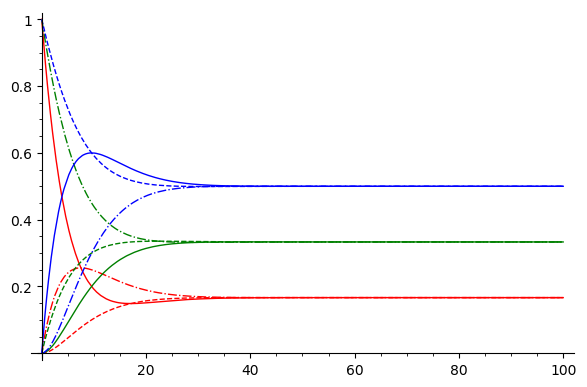

In [140]:
Plotx1V=plot(sols[0].rhs()/20,(t,0,100),color="red");
Plotx2V=plot(sols[1].rhs()/40,(t,0,100),color="red",linestyle='-.');
Plotx3V=plot(sols[2].rhs()/60,(t,0,100),color="red",linestyle='--');
Plotx1G=plot(sols[3].rhs()/20,(t,0,100),color="green");
Plotx2G=plot(sols[4].rhs()/40,(t,0,100),color="green",linestyle='-.');
Plotx3G=plot(sols[5].rhs()/60,(t,0,100),color="green",linestyle='--');
Plotx1B=plot(sols[6].rhs()/20,(t,0,100),color="blue");
Plotx2B=plot(sols[7].rhs()/40,(t,0,100),color="blue",linestyle='-.');
Plotx3B=plot(sols[8].rhs()/60,(t,0,100),color="blue",linestyle='--');
Plotx1V+Plotx2V+Plotx3V+Plotx1G+Plotx2G+Plotx3G+Plotx1B+Plotx2B+Plotx3B

